## Final Project Submission

Please fill out:
* Student name: Rafael Carrasco
* Student pace: Full Time
* Scheduled project review date/time: ???
* Instructor name: Me
* Blog post URL: ???


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [5]:
import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.api import formula

import matplotlib.pyplot as plt
import seaborn as sns
# no sqlite needed

In [43]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### How do we handle this 33 bedroom house?
* Drop the top value of bedrooms from the dataset?

In [44]:
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## What are some steps to keep in mind to start
* Figure out the question: what problem are we solving in regards to this dataset?
* **Goal** : Predict the housing prices based on features in the dataset
    * Using good data science
* Clean the data
    * Look at datatypes
    * Look for missing values (null values)
    * Look for filler data/placeholders
    * Columns, look at extra indices
    * Columns that we can drop (sparse)

### Note: Missing Data in Waterfront, View, Year Renovated

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21596 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(2)
memory usage: 3.5+ MB


In [46]:
# inspecting null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            1
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
# What are we looking for in df.describe()? 
# Sarabi - Look at the 5 point statistics
# waterfront and view
# waterfront -> bool ????

In [49]:
# calculate percentage of null values in waterfront
df.waterfront.isna().sum() / df.shape[0]

0.11001527989998611

In [50]:
# What do we do about this?
df.waterfront.unique() # change it to categorical

array([nan,  0.,  1.])

### approaches to handling null waterfront?
* replace null values with mean?
* replace nans with 0s and 1s proportionally to current distribution? (skew the data?)
    * 160 houses could get skewed - potential problem
* drop the rows?
* assume it's 0?
* delete them?
    * still have plenty of data after dropping nulls
    * but still dropping 10% 
* create a list of zipcodes and lat/lons 
* plug in 1 for all null houses in zipcodes with waterfronts

In [51]:
df.waterfront[0], df.waterfront.astype(bool)[0]

(nan, True)

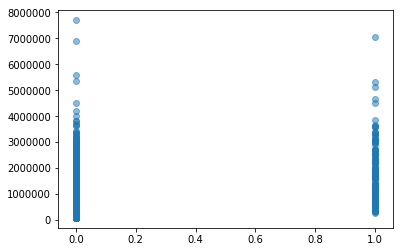

In [52]:
x = df['waterfront']
y = df['price']

plt.scatter(x,y, alpha=0.5)
plt.show()

In [53]:
df2 = df[df.waterfront==df.waterfront]
df2.shape

(19221, 21)

In [54]:
print(df2[df2.waterfront==0].shape, df2[df2.waterfront==1].shape)

(19075, 21) (146, 21)


In [55]:
df2[df2.waterfront==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.907500e+04,1.907500e+04,19074.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,19075.000000,19075.000000,19075.000000,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000
mean,4.593352e+09,5.326420e+05,3.373283,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
std,2.877189e+09,3.449592e+05,0.902010,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,1.165675,824.965911,29.391929,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
df2[df2.waterfront==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


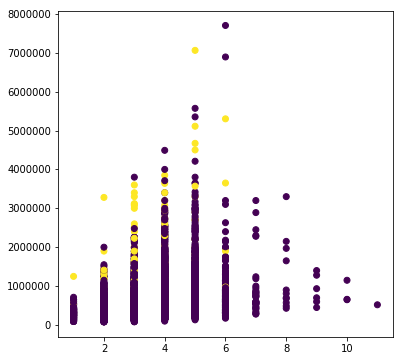

In [60]:
plt.figure(figsize=(6, 6))
plt.scatter(df.bedrooms, df.price, c=df.waterfront)
plt.show()

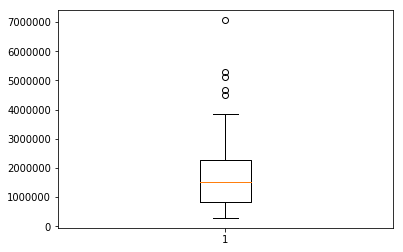

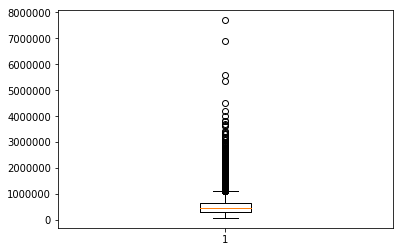

In [64]:
plt.boxplot(df2[df2.waterfront==1]['price'])
plt.show()
plt.boxplot(df2[df2.waterfront==0]['price'])
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x1c0cc6c7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1c0cc6c6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c0ded4048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c0ded7c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c0cc6cf28>,
  <matplotlib.lines.Line2D at 0x1c0cc6ce48>]}

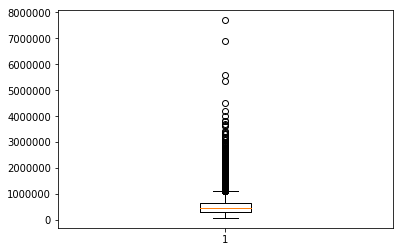

In [65]:
# OSEMIN
# Obtain
# Scrub
# Examine
# Model
# Interpret

In [66]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("kc_house_data.csv")

In [68]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [69]:
# check datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [70]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

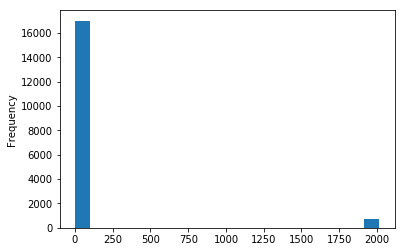

In [72]:
df.yr_renovated.plot(kind='hist', bins=20)

In [74]:
# How can we handle zeros for yr_renovated

In [75]:
# what does a 0 mean, so it was never renovated

In [79]:
df.loc[df.yr_renovated==0, 'yr_renovated'] = df.loc[df.yr_renovated==0, 'yr_built']
df[df.yr_renovated == df.yr_built].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,2001.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,1995.0,98003,47.3097,-122.327,2238,6819


In [81]:
df.yr_renovated.isna().sum()

3842

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [86]:
df_renov = df[df.yr_renovated==df.yr_renovated]
df_nrenov = df[df.yr_renovated!=df.yr_renovated]
print(df_nrenov.shape)


(3842, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,2001.0,98053,47.6561,-122.005,4760,101930


In [87]:
df_renov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 21 columns):
id               17755 non-null int64
date             17755 non-null object
price            17755 non-null float64
bedrooms         17755 non-null int64
bathrooms        17755 non-null float64
sqft_living      17755 non-null int64
sqft_lot         17755 non-null int64
floors           17755 non-null float64
waterfront       15809 non-null float64
view             17704 non-null float64
condition        17755 non-null int64
grade            17755 non-null int64
sqft_above       17755 non-null int64
sqft_basement    17755 non-null object
yr_built         17755 non-null int64
yr_renovated     17755 non-null float64
zipcode          17755 non-null int64
lat              17755 non-null float64
long             17755 non-null float64
sqft_living15    17755 non-null int64
sqft_lot15       17755 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.0+ MB


In [88]:
price = df.price

(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

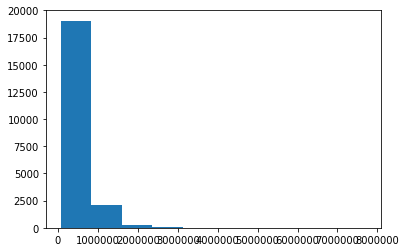

In [89]:
plt.hist(price)

(array([7.500e+01, 6.330e+02, 4.117e+03, 7.230e+03, 6.222e+03, 2.376e+03,
        7.150e+02, 1.860e+02, 3.600e+01, 7.000e+00]),
 array([11.26446411, 11.72369078, 12.18291746, 12.64214414, 13.10137082,
        13.5605975 , 14.01982417, 14.47905085, 14.93827753, 15.39750421,
        15.85673089]),
 <a list of 10 Patch objects>)

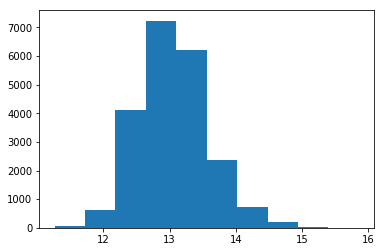

In [90]:
plt.hist(np.log(price))

In [93]:
print(price[0:5], np.log(price[0:5]))

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64 0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64


In [94]:
np.exp(13.195614)



538000.0865405777

In [100]:
2.71**14.19

1392625.1611968

In [102]:
2.71 ** 12.10000

173351.8255715168

In [103]:
2.71 ** 13.10000

469783.44729881047